# NYC Recycling Analysis for the Years 2005-2019

<p> We obtained refuse data for the five New York City boroughs for the years 1992-2019 from the <a href=https://opendata.cityofnewyork.us/> New York City</a> open data website. Upon examining the data, we noted that the only complete set of recycling information for all community districs (59) within the five boroughs was data for Paper and MGP (metal, glass, plastic) tonnage for the years 2005-2019. As such, we are using this time frame and looking at total refuse, paper, and MGP information to examine trends in recycling in New York City for this time period. </p>

In [1]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import clean refuse data
path = os.path.join("..","Clean_Data","TonnageClean.csv")
tonnage_df = pd.read_csv(path, index_col=0)
tonnage_df

,Month Index,Year/Month,Year,Month,Borough,CD,Refuse,Paper,MGP
0,23,1993 / 11,1993,11,Manhattan,1,625.2,119.4,34.4
1,45,1995 / 09,1995,9,Manhattan,1,633.1,117.2,45.8
2,44,1995 / 08,1995,8,Manhattan,1,627.5,82.4,35.6
3,243,2012 / 03,2012,3,Manhattan,1,1194.4,341.6,210.8
4,3,1992 / 03,1992,3,Manhattan,1,726.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20511,131,2002 / 11,2002,11,Bronx,6,2463.8,69.3,NaN
20512,1,1992 / 01,1992,1,Bronx,6,2165.9,NaN,NaN
20514,21,1993 / 09,1993,9,Bronx,6,1954.7,NaN,NaN
20515,9,1992 / 09,1992,9,Bronx,6,2107.1,NaN,NaN


In [3]:
# Keep data for years 2005-2019
recycling_df = tonnage_df[tonnage_df["Year"] > 2004]
recycling_df

,Month Index,Year/Month,Year,Month,Borough,CD,Refuse,Paper,MGP
3,243,2012 / 03,2012,3,Manhattan,1,1194.4,341.6,210.8
7,193,2008 / 01,2008,1,Brooklyn,7,3289.8,548.0,404.1
8,181,2007 / 01,2007,1,Brooklyn,7,3339.9,582.2,391.8
9,241,2012 / 01,2012,1,Brooklyn,7,3156.7,436.6,343.4
10,169,2006 / 01,2006,1,Brooklyn,7,3365.5,559.1,430.4
...,...,...,...,...,...,...,...,...,...
20499,160,2005 / 04,2005,4,Bronx,6,2357.2,86.9,130.0
20500,227,2010 / 11,2010,11,Bronx,6,2366.0,107.0,127.7
20503,187,2007 / 07,2007,7,Bronx,6,2466.3,97.5,119.0
20505,184,2007 / 04,2007,4,Bronx,6,2291.7,89.1,113.4


In [4]:
# Group by year to get yearly totals
recycling_gb_year = recycling_df.groupby("Year")
recycling_sum_df = recycling_gb_year.sum()

# Drop unnecessary columns
recycling_totals_df = recycling_sum_df[["Refuse", "Paper", "MGP"]]
recycling_totals_df

,Refuse,Paper,MGP
Year,,,
2005,2805761.1,372156.4,243745.7
2006,2759260.1,353539.0,234817.2
2007,2692388.4,346711.6,227955.1
2008,2629856.3,341015.4,228650.4
2009,2591531.2,311240.8,231092.6
2010,2534393.8,299359.3,220878.2
2011,2663828.9,301957.2,219438.2
2012,2586978.9,283164.4,211631.0
2013,2553356.8,284065.8,219805.5


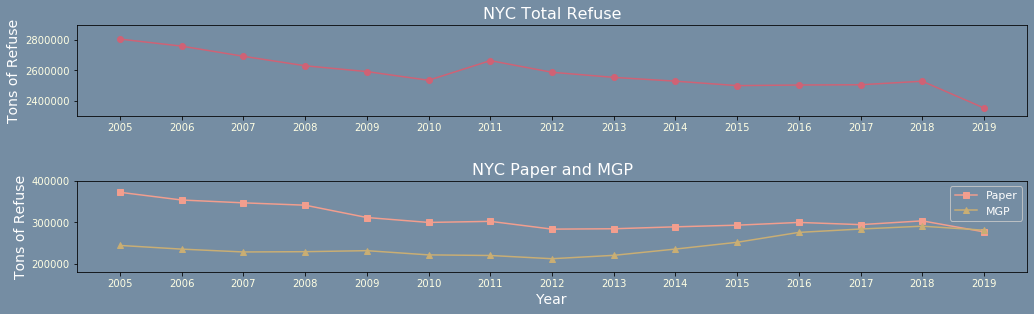

In [28]:
# Plot total refuse, paper and MPG over time
fig, ax = plt.subplots(2,1, figsize=(15,5))
year = recycling_totals_df.index

# Plot total refuse
total_refuse = recycling_totals_df["Refuse"]
ax[0].plot(year, total_refuse, marker="o", color="xkcd:rose", linestyle="solid")
ax[0].set_title("NYC Total Refuse", fontsize="16",color='xkcd:white')
ax[0].set_xticks(year)
ax[0].set_ylabel("Tons of Refuse", fontsize="14",color='xkcd:white')
ax[0].set_ylim(2300000,2900000)

# Plot Paper and MPG
paper = recycling_totals_df["Paper"]
ax[1].plot(year, paper, marker="s", color="xkcd:blush", linestyle="solid", label="Paper")

MGP = recycling_totals_df["MGP"]
ax[1].plot(year, MGP, marker="^", color="xkcd:sandstone", linestyle="solid", label="MGP")
ax[1].set_title("NYC Paper and MGP", fontsize="16",color='xkcd:white')
ax[1].set_xticks(year)
ax[1].set_ylabel("Tons of Refuse", fontsize="14",color='xkcd:white')
ax[1].set_ylim(180000,400000)

# Annotate plot
legend = plt.legend(loc="best", prop={"size":11},facecolor="xkcd:blue/grey")
plt.setp(legend.get_texts(),color="xkcd:white")
plt.xlabel("Year", fontsize="14",color='xkcd:white')
fig.tight_layout(pad=3)
ax[0].set_facecolor('xkcd:blue/grey')
ax[1].set_facecolor('xkcd:blue/grey')
ax[0].tick_params(labelcolor='xkcd:off white')
ax[1].tick_params(labelcolor='xkcd:off white')
fig.patch.set_facecolor('xkcd:blue/grey')

# Save plot
fig.savefig(os.path.join("..","Analysis_Images","NYC Total Refuse, Paper and MGP.png"),facecolor=fig.get_facecolor())

In [6]:
# Build dataframe for percentage totals
recycling_totals_df["Total"] = recycling_totals_df["Refuse"] + recycling_totals_df["Paper"] + recycling_totals_df["MGP"]
recycling_percents_df = round(recycling_totals_df.div(recycling_totals_df["Total"], axis=0),4)*100
recycling_percents_df

<ipython-input-6-bc2b5342b08c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recycling_totals_df["Total"] = recycling_totals_df["Refuse"] + recycling_totals_df["Paper"] + recycling_totals_df["MGP"]


,Refuse,Paper,MGP,Total
Year,,,,
2005,82.00,10.88,7.12,100.0
2006,82.42,10.56,7.01,100.0
2007,82.41,10.61,6.98,100.0
2008,82.20,10.66,7.15,100.0
2009,82.69,9.93,7.37,100.0
2010,82.97,9.80,7.23,100.0
2011,83.63,9.48,6.89,100.0
2012,83.94,9.19,6.87,100.0
2013,83.52,9.29,7.19,100.0


[None, None, None, None, None, None]

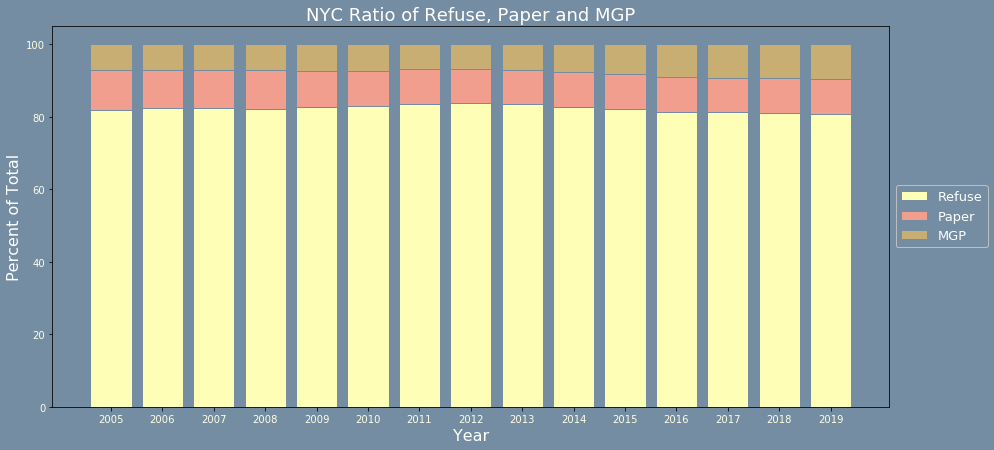

In [7]:
# Plot refuse, paper and MGP as a percentage of total over time
fig, ax = plt.subplots(figsize=(15,7))
year = recycling_totals_df.index
plt.xticks(year,color="xkcd:off white")
plt.yticks(color="xkcd:off white")
ax.set_facecolor('xkcd:blue/grey')
fig.patch.set_facecolor('xkcd:blue/grey')

# Plot refuse percentage
Refuse_pct = recycling_percents_df["Refuse"] 
plt.bar(year, Refuse_pct, color="xkcd:light beige", edgecolor="xkcd:blue/grey", label="Refuse")  

# Plot paper percentage
Paper_pct = recycling_percents_df["Paper"] 
plt.bar(year, Paper_pct, bottom = Refuse_pct.tolist(), color="xkcd:blush", edgecolor="xkcd:blue/grey", label="Paper")

# Plot MGP percentage
MGP_pct = recycling_percents_df["MGP"] 
plt.bar(year, MGP_pct, bottom= (Refuse_pct + Paper_pct).tolist(), color="xkcd:sandstone", edgecolor="xkcd:blue/grey", label="MGP")

# Annotate graph
plt.title("NYC Ratio of Refuse, Paper and MGP", fontsize="18",color='xkcd:white')
plt.xlabel("Year", fontsize="16",color='xkcd:white')
plt.ylabel("Percent of Total", fontsize="16",color='xkcd:white')   
legend = plt.legend(loc="best", bbox_to_anchor=(1,.6), ncol=1, prop={"size":13},facecolor="xkcd:blue/grey")
plt.setp(legend.get_texts(),color='xkcd:white')

In [8]:
# Save graph as PNG
fig.savefig(os.path.join("..","Analysis_Images","NYC Ratio of Refuse, Paper, and MGP.png"),facecolor=fig.get_facecolor())